## Context of the Project

The Supermarket Sales project aims to analyze sales data from a supermarket to gain insights into customer behavior, sales trends, and inventory management. By leveraging data analysis and visualization techniques, the project seeks to answer key business questions and support decision-making processes.


# Datas Description

### Columns:

- **Invoice ID**: Unique identifier for each transaction.
- **Branch**: The branch of the supermarket where the transaction took place (A, B, or C).
- **City**: The city where the branch is located (e.g., New York, Los Angeles, Chicago).
- **Customer Type**: Type of customer (e.g., Member, Normal).
- **Gender**: Gender of the customer (Male, Female).
- **Product Line**: Category of products purchased (e.g., Health and beauty, Electronic accessories, Home and lifestyle, Sports and travel, Food and beverages, Fashion accessories).
- **Unit Price**: Price per unit of the product.
- **Quantity**: Number of units purchased.
- **Tax 5%**: Tax amount applied to the transaction (5% of the total price).
- **Total**: Total amount paid by the customer (including tax). 
- **Rewarded Points**: Loyalty points earned by the customer from the transaction.

In [2]:
# Imports 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Load dataset
df = pd.read_csv(r'data\sales.csv')

# Show the firt 5 rows of the dataframe
df.head()


# check for duplicates for 'sale_id' column
amount_duplicates = df['sale_id'].duplicated().sum()

# print the amount of duplicates
print(amount_duplicates)    

# Get all duplicate rows based on 'sale_id' column
duplicates = df[df.duplicated(subset=['sale_id'],keep=False)]

# Show all duplicate rows
print(duplicates)

# Show all rows where there are null values
null_values = df[df.isnull().any(axis=1)]
print('->', null_values)


0
Empty DataFrame
Columns: [sale_id, branch, city, customer_type, gender, product_name, product_category, unit_price, quantity, tax, total_price, reward_points]
Index: []
-> Empty DataFrame
Columns: [sale_id, branch, city, customer_type, gender, product_name, product_category, unit_price, quantity, tax, total_price, reward_points]
Index: []


In [4]:
for colum in df.select_dtypes('object').columns:
    df[colum] = (df[colum]
                 .str.strip()
                 .replace('"', '')
                 .str.lower()
                 )


df.head()

# Check data types of each column
print(df.dtypes)
    

sale_id               int64
branch               object
city                 object
customer_type        object
gender               object
product_name         object
product_category     object
unit_price          float64
quantity              int64
tax                 float64
total_price         float64
reward_points         int64
dtype: object


## 1. Which city has the highest total sales?

             TotalSales
city                   
chicago        42584.71
los angeles    35772.26
new york       40226.93


C:\Users\newUs\AppData\Local\Temp\ipykernel_24020\2025506429.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_sales_by_city.index, y='TotalSales', data=sorted_sales_by_city , width=0.5, palette='YlOrBr')


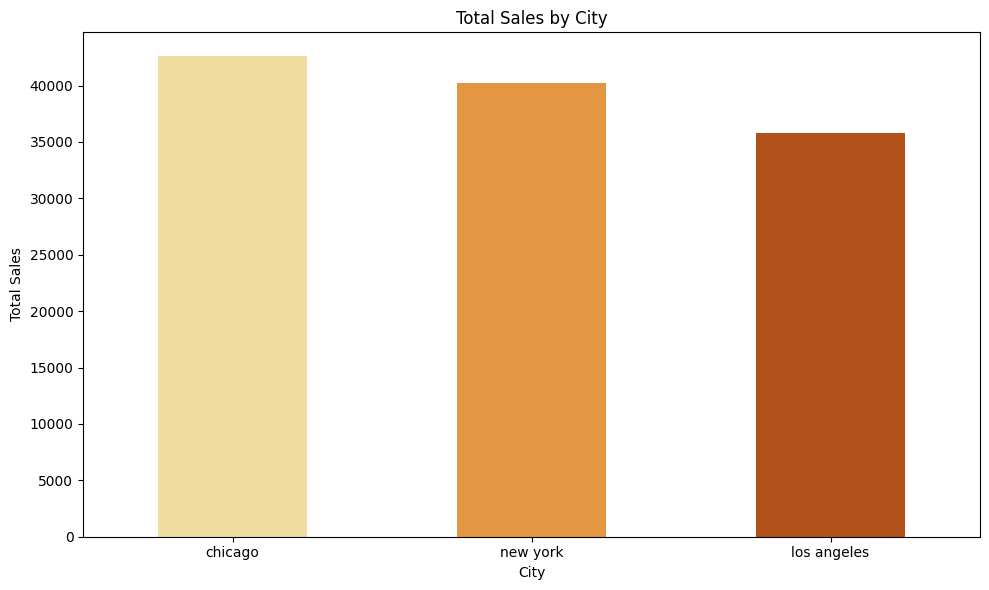

In [ ]:
sales_by_city = df.groupby('city')['total_price'].sum().to_frame('TotalSales')
print(sales_by_city)

sorted_sales_by_city = sales_by_city.sort_values(by='TotalSales', ascending=False).round(2)

# visualize in a bar plot 
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_sales_by_city.index, y='TotalSales', data=sorted_sales_by_city , width=0.5, palette='magma')
plt.title('Total Sales by City')

plt.xlabel('City')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()








- Chicago has the highest total sales among the three cities with 42584 USD.

## 2. What is the distribution of total sales across different cities?

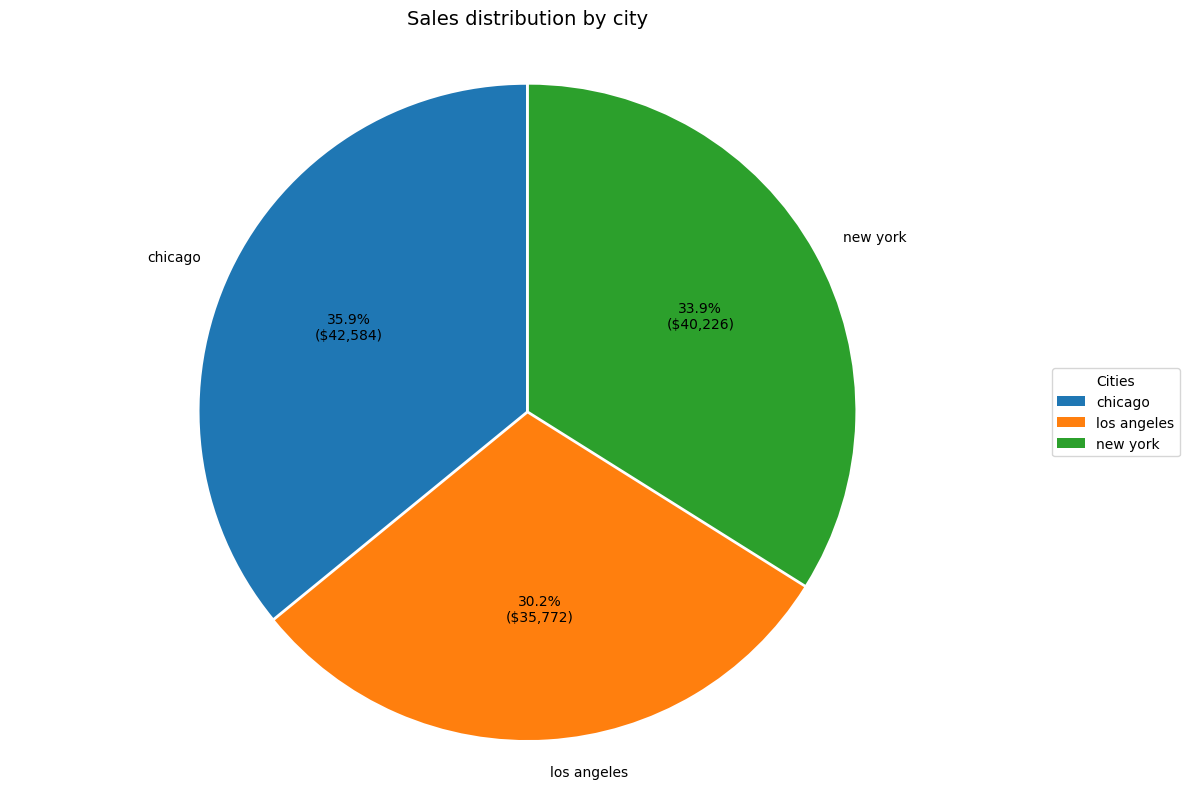

In [22]:

# Alternativa más detallada con matplotlib
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(sales_by_city['TotalSales'],
                                  labels=sales_by_city.index,
                                  autopct=lambda pct: f'{pct:.1f}%\n(${int(pct/100.*sum(sales_by_city["TotalSales"])):,.0f})',
                                  startangle=90,
                                  explode=[0.005, 0.005, 0.005])  # Separación de las rebanadas

plt.title('Sales distribution by city', pad=20, size=14)
plt.legend(wedges, sales_by_city.index,
          title="Cities",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.tight_layout()
plt.show()

### 3. What is the most volatile city in terms of ticket sales?

In [23]:
# 1. Group by city and calculate multiple metrics using .agg()
city_metrics_advanced_en = df.groupby('city')['total_price'].agg(
    Average_Ticket='mean',
    Standard_Deviation='std'
).reset_index()

# 2. Calculate the Coefficient of Variation (CV)
# CV = Standard Deviation / Mean (shows volatility relative to the average)
city_metrics_advanced_en['CV (%)'] = (city_metrics_advanced_en['Standard_Deviation'] / city_metrics_advanced_en['Average_Ticket']) * 100

# 3. Round the results and rename columns for final output
city_metrics_advanced_en = city_metrics_advanced_en.round(2)
city_metrics_advanced_en.columns = ['City', 'Average Ticket Value', 'Standard Deviation', 'Volatility (CV %)']

# Print the resulting table
print("Analysis of Ticket Volatility by City:\n")
print(city_metrics_advanced_en.to_markdown(index=False, numalign="left", stralign="left"))

Analysis of Ticket Volatility by City:

| City        | Average Ticket Value   | Standard Deviation   | Volatility (CV %)   |
|:------------|:-----------------------|:---------------------|:--------------------|
| chicago     | 129.04                 | 102.83               | 79.69               |
| los angeles | 109.73                 | 96.84                | 88.25               |
| new york    | 116.94                 | 99.39                | 84.99               |


C:\Users\newUs\AppData\Local\Temp\ipykernel_24020\1960826280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='total_price', data=df, palette='pastel')


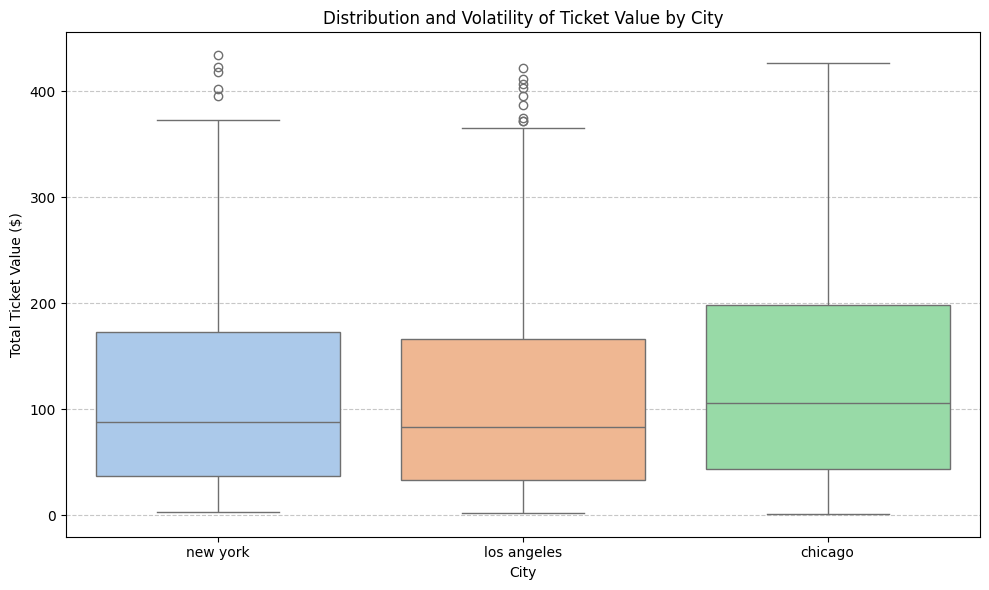

In [20]:
# Create the Box Plot to visualize the distribution of total_price by city.
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='total_price', data=df, palette='pastel')

# Add titles and labels
plt.title('Distribution and Volatility of Ticket Value by City')
plt.xlabel('City')
plt.ylabel('Total Ticket Value ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

This high volatility is visually confirmed in the Box Plot. While the average ticket values are relatively similar across cities, the distribution of spending in Los Angeles clearly exhibits greater relative dispersion. This translates into a less predictable customer base, showing an inconsistent mix of very small purchases and sporadic large ones, thereby justifying its high Coefficient of Variation.

## 4. What is the Total Revenue Contribution (sum of total_price) of each product_category to the business? 

| Product Category   | Total Revenue   |
|:-------------------|:----------------|
| personal care      | 27050.2         |
| fruits             | 26197.5         |
| beverages          | 22983.3         |
| household          | 21615.8         |
| stationery         | 20737.1         |


C:\Users\newUs\AppData\Local\Temp\ipykernel_24020\4274093838.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greens')


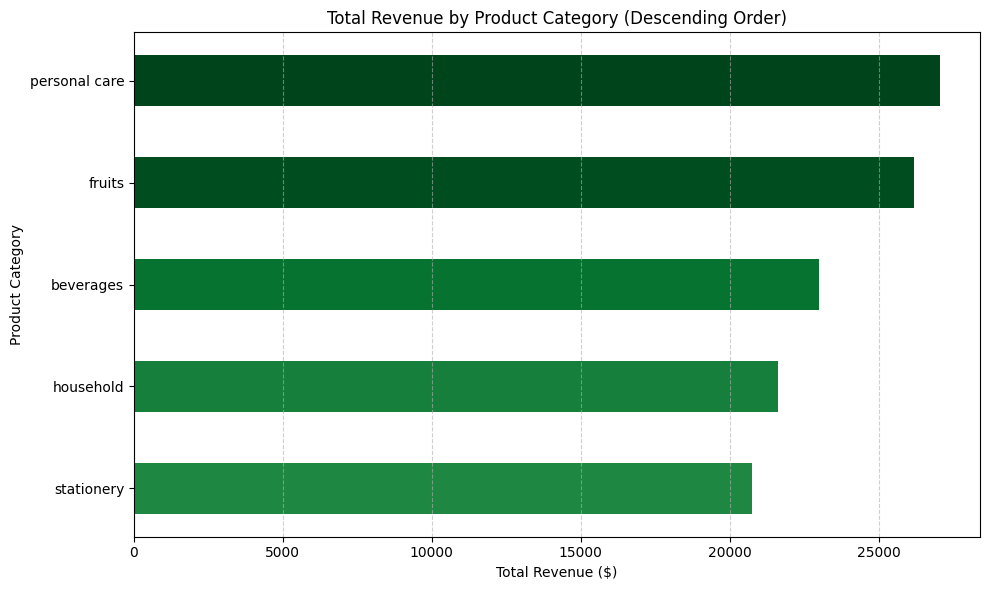

In [30]:

import matplotlib.cm as cm 

# --- Data Preparation  ---
revenue_by_category = df.groupby('product_category')['total_price'].sum().to_frame('TotalRevenue').reset_index()
# Sort ascending for correct visual descending order in barh
sorted_revenue_by_category = revenue_by_category.sort_values(by='TotalRevenue', ascending=True).round(2)

sorted_revenue_by_category.columns = ['Product Category', 'Total Revenue']

# Print the resulting table
print(sorted_revenue_by_category.sort_values(by='Total Revenue', ascending=False).to_markdown(index=False, numalign="left", stralign="left"))

# --- Sequential Color Logic ---
# 1. Define the sequential colormap
cmap = cm.get_cmap('Greens')

# 2. Normalize the Total Revenue values to map them to the 0-1 range of the colormap.
# This assigns darker shades to higher revenue values.
norm_values = sorted_revenue_by_category['Total Revenue'] / sorted_revenue_by_category['Total Revenue'].max()

# 3. Generate a list of colors
colors = [cmap(i) for i in norm_values]

# --- Generate the Horizontal Bar Chart ---
plt.figure(figsize=(10, 6))

# Use plt.barh for a horizontal bar chart, passing the 'colors' list
plt.barh(
    sorted_revenue_by_category['Product Category'], 
    sorted_revenue_by_category['Total Revenue'], 
    color=colors,
    height=0.5
)

# Add titles and labels
plt.title("Total Revenue by Product Category (Descending Order)")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product Category")

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Personal Care products contribute the most to the business revenue, generating a total of 27,050 USD. This is followed by  fruits  with 26,197 USD and Beverages with 22,983 USD,  Household items with 21,615 USD. On the lower end, stationery contribute 20,737 USD.

## 5. What is the Average Ticket Value (Average total_price) difference between Member and Normal customers?

Total Revenue by Category, Segmented by Customer Type:

| product_category   | member   | normal   |
|:-------------------|:---------|:---------|
| personal care      | 15370.6  | 11679.6  |
| fruits             | 14045.7  | 12151.7  |
| beverages          | 11807    | 11176.3  |
| household          | 11613.9  | 10002    |
| stationery         | 10376.5  | 10360.7  |


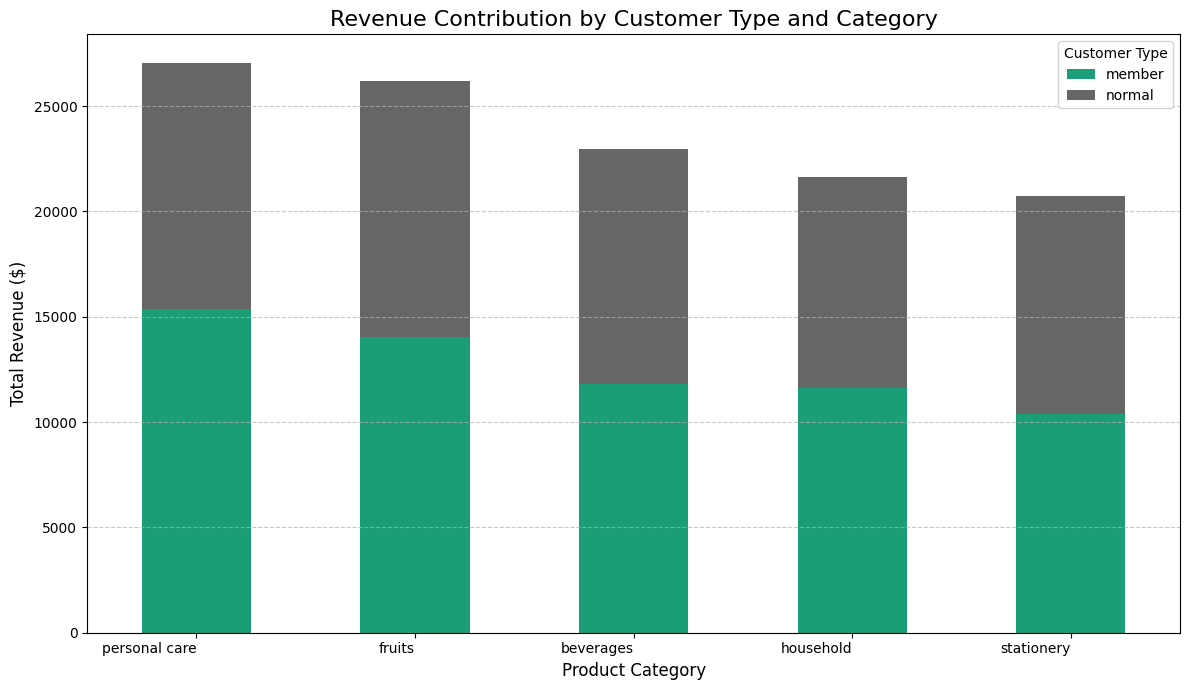

In [37]:

# 1. Group by product_category AND customer_type, and sum total_price
# The unstack() method pivots the customer_type from an index level into new columns.
customer_category_revenue = df.groupby(['product_category', 'customer_type'])['total_price'].sum().unstack(fill_value=0)

# 2. Sort the categories based on total revenue for better visualization
customer_category_revenue['Total_Revenue'] = customer_category_revenue['member'] + customer_category_revenue['normal']
customer_category_revenue = customer_category_revenue.sort_values(by='Total_Revenue', ascending=False)
customer_category_revenue = customer_category_revenue.drop(columns=['Total_Revenue']).round(2)

# Print the resulting table for reference
print("Total Revenue by Category, Segmented by Customer Type:\n")
print(customer_category_revenue.to_markdown(numalign="left", stralign="left"))

# --- Generate the Stacked Bar Chart ---
plt.figure(figsize=(12, 7))

# Use the plot.bar() method directly on the DataFrame, setting stacked=True
# ax=plt.gca() ensures the plot is drawn onto the current figure.
customer_category_revenue.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Dark2')

# Adjust titles and labels
plt.title('Revenue Contribution by Customer Type and Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=0, ha='right') # Rotate X-labels for readability
plt.legend(title='Customer Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()